In [1]:
#Import libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('D:/Users/Clark/Desktop/Data Science/Datasets')

# The following dataset comes from the City of Raleigh's-Open Data repository and represents police incident data from 2005-present for the city. For more information, see the link below.

https://data.raleighnc.gov/Police/Police-Crime-Incident-Data-from-Jan-1-2005-Present/csw9-dd5k

In [2]:
#Read in Crime Data
crimes = pd.read_csv('raleigh_crimes.csv', parse_dates=['INC DATETIME'])
crimes.head()

,LCR,LCR DESC,INC DATETIME,INC NO,LOCATION,DISTRICT
0,81A,Miscellaneous/All Other Non-Offenses,2014-08-14 22:21:00,P14085939,"(35.82367885079229, -78.62333290344488)",NaN
1,80B,All Other/Damage to Property (minor),2014-08-14 22:07:00,P14085936,"(35.75644323486635, -78.60984284716082)",NaN
2,54B,Drug Violation/Possession,2014-08-14 21:44:00,P14085935,"(35.85812999173558, -78.70588414548287)",NaN
3,81A,Miscellaneous/All Other Non-Offenses,2014-08-14 21:41:00,P14085934,"(35.85471855573689, -78.56999498891395)",NaN
4,81A,Miscellaneous/All Other Non-Offenses,2014-08-14 20:56:00,P14085932,"(35.81629703301527, -78.61212871882577)",NaN


In [3]:
#What does the structure of the dataset look like?
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565223 entries, 0 to 565222
Data columns (total 6 columns):
LCR             561956 non-null object
LCR DESC        561954 non-null object
INC DATETIME    561959 non-null datetime64[ns]
INC NO          565223 non-null object
LOCATION        493516 non-null object
DISTRICT        559312 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 25.9+ MB


In [4]:
#Define categories to conserve memory
crimes['DISTRICT'] = crimes['DISTRICT'].astype('category')
crimes['LCR'] = crimes['LCR'].astype('category')
crimes['LCR DESC'] = crimes['LCR DESC'].astype('category')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565223 entries, 0 to 565222
Data columns (total 6 columns):
LCR             561956 non-null category
LCR DESC        561954 non-null category
INC DATETIME    561959 non-null datetime64[ns]
INC NO          565223 non-null object
LOCATION        493516 non-null object
DISTRICT        559312 non-null category
dtypes: category(3), datetime64[ns](1), object(2)
memory usage: 15.7+ MB


# How many different types of crimes have been reported?

Note: LCR stands for (Local crime reporting code)

In [10]:
crimes['LCR'].nunique()

428

# What are the most popular crimes?

In [11]:
crimes['LCR DESC'].str.lower().value_counts().head(10)

assault simple (not aggravated)                      36689
misc/all other / no offense committed                32766
miscellaneous/all other non-offenses                 20080
misc/mental commitment                               18469
drugs/possession/marijuana                           18023
all other/all other offenses (comm.threats, etc.)    16049
damage to vehicles                                   15211
damage to property/private property                  14923
assault/simple                                       12465
driving while impaired                               10032
Name: LCR DESC, dtype: int64

# What are the highest Crime Locations

Note: These districts likely represent the locations where the crimes were reported and did not necessarily occur there. See the dataset webpage for more info.

Text(0.5,1,'Crimes Reported by District')

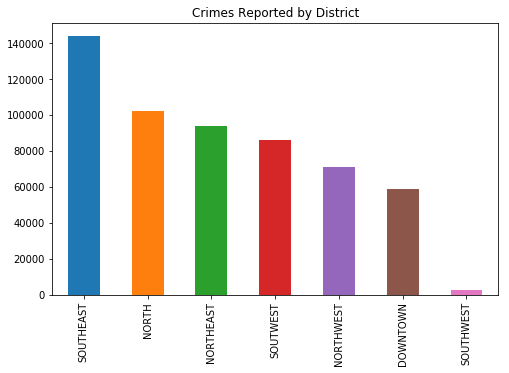

In [12]:
crimes['DISTRICT'].value_counts().plot.bar(figsize=(8,5))
plt.title('Crimes Reported by District')

In [14]:
#Create Month and Day Variables for further exploration.
crimes['Month'] = crimes['INC DATETIME'].dt.month
crimes['Day'] = crimes['INC DATETIME'].dt.weekday_name
crimes['Year'] = crimes['INC DATETIME'].dt.year
crimes.head(2)

,LCR,LCR DESC,INC DATETIME,INC NO,LOCATION,DISTRICT,Month,Day,Year
0,81A,Miscellaneous/All Other Non-Offenses,2014-08-14 22:21:00,P14085939,"(35.82367885079229, -78.62333290344488)",NaN,8.0,Thursday,2014.0
1,80B,All Other/Damage to Property (minor),2014-08-14 22:07:00,P14085936,"(35.75644323486635, -78.60984284716082)",NaN,8.0,Thursday,2014.0


# Which months had the highest number of crimes?

In [15]:
crimes['Month'].value_counts().head(3)

#Note: Maybe it's the hot weather? The months were May, August, and July.

5.0    50486
8.0    49573
7.0    48647
Name: Month, dtype: int64

# Which months had the lowest number of crimes?

In [16]:
crimes['Month'].value_counts(ascending=True).head(3)

#Note: Crimes seem to be occuring less in the colder months? I figured December would be higher.

2.0     40763
11.0    44244
12.0    45410
Name: Month, dtype: int64

# What do crimes look like by days of the week?

In [17]:
crimes['Day'].value_counts()

#It's really not that much difference between days; although Sunday's rates are a little lower than the other days.

Friday       83797
Monday       83608
Wednesday    83223
Tuesday      82972
Thursday     81202
Saturday     76022
Sunday       71135
Name: Day, dtype: int64

# Is crime getting better or worse on average?

Note: not sure if the data is normalized for the population increase over the years.

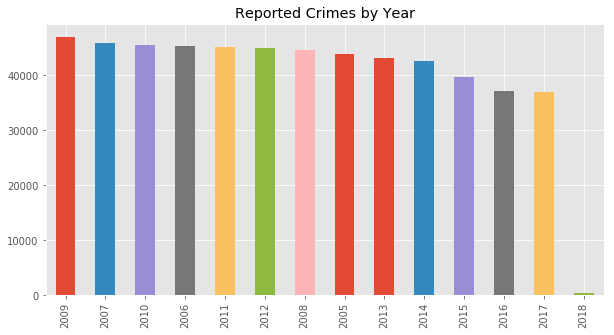

In [22]:
plt.title('Reported Crimes by Year')
plt.style.use('ggplot')

#Note change year to integer format prior to graphing
crimes['Year'].dropna().astype(int).value_counts().plot.bar(figsize=(10,5))

#Some of the lowest crime rates have occured over the last few years. 